In [70]:
import numpy as np 
import librosa
import pandas as pd
import os
import matplotlib.pyplot as plt 
import IPython.display as ipd
import librosa.display
from os import listdir
from os.path import isfile, join
from scipy.io import wavfile

In [54]:
plt.rcParams['figure.figsize'] = (12,7)

In [55]:
a = os.listdir('music/')

In [58]:
y,sr = librosa.load('music/Alan Walker - Faded (YT)_Audio.mp4',duration = 60)

In [35]:
ipd.Audio(y,rate=sr)

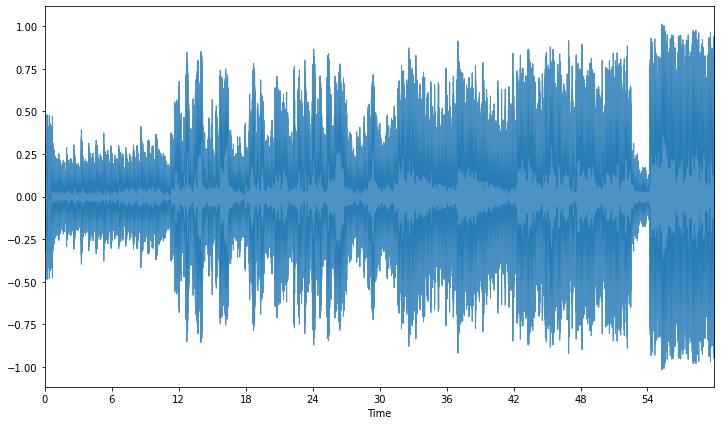

In [36]:
librosa.display.waveplot(y, sr, alpha=0.8)

In [65]:
def extract_feature(path):
    id = 1  # Song ID
    feature_set = pd.DataFrame()  # Feature Matrix
    
    # Individual Feature Vectors
    songname_vector = pd.Series(dtype='float64')
    tempo_vector = pd.Series(dtype='float64')
    total_beats = pd.Series(dtype='float64')
    average_beats = pd.Series(dtype='float64')
    chroma_stft_mean = pd.Series(dtype='float64')
    chroma_stft_std = pd.Series(dtype='float64')
    chroma_stft_var = pd.Series(dtype='float64')
    chroma_cq_mean = pd.Series(dtype='float64')
    chroma_cq_std = pd.Series(dtype='float64')
    chroma_cq_var = pd.Series(dtype='float64')
    chroma_cens_mean = pd.Series(dtype='float64')
    chroma_cens_std = pd.Series(dtype='float64')
    chroma_cens_var = pd.Series(dtype='float64')
    mel_mean = pd.Series(dtype='float64')
    mel_std = pd.Series(dtype='float64')
    mel_var = pd.Series(dtype='float64')
    mfcc_mean = pd.Series(dtype='float64')
    mfcc_std = pd.Series(dtype='float64')
    mfcc_var = pd.Series(dtype='float64')
    mfcc_delta_mean = pd.Series(dtype='float64')
    mfcc_delta_std = pd.Series(dtype='float64')
    mfcc_delta_var = pd.Series(dtype='float64')
    rmse_mean = pd.Series(dtype='float64')
    rmse_std = pd.Series(dtype='float64')
    rmse_var = pd.Series(dtype='float64')
    cent_mean = pd.Series(dtype='float64')
    cent_std = pd.Series(dtype='float64')
    cent_var = pd.Series(dtype='float64')
    spec_bw_mean = pd.Series(dtype='float64')
    spec_bw_std = pd.Series(dtype='float64')
    spec_bw_var = pd.Series(dtype='float64')
    contrast_mean = pd.Series(dtype='float64')
    contrast_std = pd.Series(dtype='float64')
    contrast_var = pd.Series(dtype='float64')
    rolloff_mean = pd.Series(dtype='float64')
    rolloff_std = pd.Series(dtype='float64')
    rolloff_var = pd.Series(dtype='float64')
    poly_mean = pd.Series(dtype='float64')
    poly_std = pd.Series(dtype='float64')
    poly_var = pd.Series(dtype='float64')
    tonnetz_mean = pd.Series(dtype='float64')
    tonnetz_std = pd.Series(dtype='float64')
    tonnetz_var = pd.Series(dtype='float64')
    zcr_mean = pd.Series(dtype='float64')
    zcr_std = pd.Series(dtype='float64')
    zcr_var = pd.Series(dtype='float64')
    harm_mean = pd.Series(dtype='float64')
    harm_std = pd.Series(dtype='float64')
    harm_var = pd.Series(dtype='float64')
    perc_mean = pd.Series(dtype='float64')
    perc_std = pd.Series(dtype='float64')
    perc_var = pd.Series(dtype='float64')
    frame_mean = pd.Series(dtype='float64')
    frame_std = pd.Series(dtype='float64')
    frame_var = pd.Series(dtype='float64')
    
    
    # Traversing over each file in path
    file_data = [f for f in listdir(path) if isfile (join(path, f))]
    for line in file_data:
        if ( line[-1:] == '\n' ):
            line = line[:-1]

        # Reading Song
        songname = path + line
        y, sr = librosa.load(songname, duration=60)
        S = np.abs(librosa.stft(y))
        
        # Extracting Features
        tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
        chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
        melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        poly_features = librosa.feature.poly_features(S=S, sr=sr)
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        harmonic = librosa.effects.harmonic(y)
        percussive = librosa.effects.percussive(y)
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        mfcc_delta = librosa.feature.delta(mfcc)
    
        onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
        frames_to_time = librosa.frames_to_time(onset_frames[:20], sr=sr)
        
        # Transforming Features
        songname_vector.at[id] =  line  # song name
        tempo_vector.at[id]= tempo  # tempo
        total_beats.at[id] =  sum(beats)  # beats
        average_beats.at[id] =  np.average(beats)
        chroma_stft_mean.at[id]= np.mean(chroma_stft)  # chroma stft
        chroma_stft_std.at[id] = np.std(chroma_stft)
        chroma_stft_var.at[id]= np.var(chroma_stft)
        chroma_cq_mean.at[id]= np.mean(chroma_cq)  # chroma cq
        chroma_cq_std.at[id]= np.std(chroma_cq)
        chroma_cq_var.at[id]= np.var(chroma_cq)
        chroma_cens_mean.at[id]= np.mean(chroma_cens) # chroma cens
        chroma_cens_std.at[id] = np.std(chroma_cens)
        chroma_cens_var.at[id]= np.var(chroma_cens)
        mel_mean.at[id]= np.mean(melspectrogram)  # melspectrogram
        mel_std.at[id]= np.std(melspectrogram)
        mel_var.at[id]= np.var(melspectrogram)
        mfcc_mean.at[id]= np.mean(mfcc)  # mfcc
        mfcc_std.at[id]= np.std(mfcc)
        mfcc_var.at[id]= np.var(mfcc)
        mfcc_delta_mean.at[id]= np.mean(mfcc_delta)  # mfcc delta
        mfcc_delta_std.at[id]= np.std(mfcc_delta)
        mfcc_delta_var.at[id]= np.var(mfcc_delta)
        rmse_mean.at[id]= np.mean(rmse)  # rmse
        rmse_std.at[id]= np.std(rmse)
        rmse_var.at[id]= np.var(rmse)
        cent_mean.at[id]= np.mean(cent)  # cent
        cent_std.at[id]= np.std(cent)
        cent_var.at[id]= np.var(cent)
        spec_bw_mean.at[id]= np.mean(spec_bw)  # spectral bandwidth
        spec_bw_std.at[id]= np.std(spec_bw)
        spec_bw_var.at[id]= np.var(spec_bw)
        contrast_mean.at[id]= np.mean(contrast)  # contrast
        contrast_std.at[id]= np.std(contrast)
        contrast_var.at[id]= np.var(contrast)
        rolloff_mean.at[id]= np.mean(rolloff)  # rolloff
        rolloff_std.at[id]= np.std(rolloff)
        rolloff_var.at[id]= np.var(rolloff)
        poly_mean.at[id]= np.mean(poly_features)  # poly features
        poly_std.at[id]= np.std(poly_features)
        poly_var.at[id]= np.var(poly_features)
        tonnetz_mean.at[id]= np.mean(tonnetz)  # tonnetz
        tonnetz_std.at[id]= np.std(tonnetz)
        tonnetz_var.at[id]= np.var(tonnetz)
        zcr_mean.at[id]= np.mean(zcr)  # zero crossing rate
        zcr_std.at[id]= np.std(zcr)
        zcr_var.at[id]= np.var(zcr)
        harm_mean.at[id]= np.mean(harmonic)  # harmonic
        harm_std.at[id]= np.std(harmonic)
        harm_var.at[id]= np.var(harmonic)
        perc_mean.at[id]= np.mean(percussive)  # percussive
        perc_std.at[id]= np.std(percussive)
        perc_var.at[id]= np.var(percussive)
        frame_mean.at[id]= np.mean(frames_to_time)  # frames
        frame_std.at[id]= np.std(frames_to_time)
        frame_var.at[id]= np.var(frames_to_time)
        
        print(songname)
        id = id+1
    
    # Concatenating Features into one csv and json format
    feature_set['song_name'] = songname_vector  # song name
    feature_set['tempo'] = tempo_vector  # tempo 
    feature_set['total_beats'] = total_beats  # beats
    feature_set['average_beats'] = average_beats
    feature_set['chroma_stft_mean'] = chroma_stft_mean  # chroma stft
    feature_set['chroma_stft_std'] = chroma_stft_std
    feature_set['chroma_stft_var'] = chroma_stft_var
    feature_set['chroma_cq_mean'] = chroma_cq_mean  # chroma cq
    feature_set['chroma_cq_std'] = chroma_cq_std
    feature_set['chroma_cq_var'] = chroma_cq_var
    feature_set['chroma_cens_mean'] = chroma_cens_mean  # chroma cens
    feature_set['chroma_cens_std'] = chroma_cens_std
    feature_set['chroma_cens_var'] = chroma_cens_var
    feature_set['melspectrogram_mean'] = mel_mean  # melspectrogram
    feature_set['melspectrogram_std'] = mel_std
    feature_set['melspectrogram_var'] = mel_var
    feature_set['mfcc_mean'] = mfcc_mean  # mfcc
    feature_set['mfcc_std'] = mfcc_std
    feature_set['mfcc_var'] = mfcc_var
    feature_set['mfcc_delta_mean'] = mfcc_delta_mean  # mfcc delta
    feature_set['mfcc_delta_std'] = mfcc_delta_std
    feature_set['mfcc_delta_var'] = mfcc_delta_var
    feature_set['rmse_mean'] = rmse_mean  # rmse
    feature_set['rmse_std'] = rmse_std
    feature_set['rmse_var'] = rmse_var
    feature_set['cent_mean'] = cent_mean  # cent
    feature_set['cent_std'] = cent_std
    feature_set['cent_var'] = cent_var
    feature_set['spec_bw_mean'] = spec_bw_mean  # spectral bandwidth
    feature_set['spec_bw_std'] = spec_bw_std
    feature_set['spec_bw_var'] = spec_bw_var
    feature_set['contrast_mean'] = contrast_mean  # contrast
    feature_set['contrast_std'] = contrast_std
    feature_set['contrast_var'] = contrast_var
    feature_set['rolloff_mean'] = rolloff_mean  # rolloff
    feature_set['rolloff_std'] = rolloff_std
    feature_set['rolloff_var'] = rolloff_var
    feature_set['poly_mean'] = poly_mean  # poly features
    feature_set['poly_std'] = poly_std
    feature_set['poly_var'] = poly_var
    feature_set['tonnetz_mean'] = tonnetz_mean  # tonnetz
    feature_set['tonnetz_std'] = tonnetz_std
    feature_set['tonnetz_var'] = tonnetz_var
    feature_set['zcr_mean'] = zcr_mean  # zero crossing rate
    feature_set['zcr_std'] = zcr_std
    feature_set['zcr_var'] = zcr_var
    feature_set['harm_mean'] = harm_mean  # harmonic
    feature_set['harm_std'] = harm_std
    feature_set['harm_var'] = harm_var
    feature_set['perc_mean'] = perc_mean  # percussive
    feature_set['perc_std'] = perc_std
    feature_set['perc_var'] = perc_var
    feature_set['frame_mean'] = frame_mean  # frames
    feature_set['frame_std'] = frame_std
    feature_set['frame_var'] = frame_var
    
    # Converting Dataframe into CSV Excel and JSON file
    feature_set.to_csv('Emotion_features.csv')
    feature_set.to_json('Emotion_features.json')

In [67]:
extract_feature('music/')

music/Conro - Thrill of It.wav
music/NIVIRO - The Labyrinth.wav
music/Billy Talent - Viking Death March.wav
music/Alan Walker - Faded.wav
music/Clarx Harddope - Castle.wav


NoBackendError: 

In [ ]:
df = pd.read_csv('Emotion_features.csv')

In [71]:
df

,Unnamed: 0,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,Diviners - Savannah (feat. Philly K) [NCS Rele...,103.359375,109347,1163.265957,0.282364,0.298697,0.089220,0.340196,0.297225,...,0.007168,-0.000007,0.159261,0.025364,-0.000068,0.071417,0.005100,3.601415,1.796854,3.228684
1,2,TheFatRat Anjulie - Close To The Sun (YT)_Audi...,89.102909,108705,1531.056338,0.348834,0.322355,0.103913,0.439907,0.296028,...,0.007748,0.000024,0.165664,0.027444,0.000107,0.136674,0.018680,11.845660,1.248950,1.559877
2,3,Diamond Eyes - 23 [NCS Release] (YT)_Audio.wav,73.828125,90874,1244.849315,0.299905,0.305887,0.093567,0.337516,0.279436,...,0.000883,0.000014,0.195859,0.038361,-0.000045,0.078406,0.006148,2.917587,1.589681,2.527087
3,4,Linko - Goodbye [NCS Release] (YT)_Audio.wav,143.554688,183911,1425.666667,0.341987,0.316120,0.099932,0.380427,0.289340,...,0.003934,0.000007,0.176544,0.031168,0.000154,0.119576,0.014298,10.159891,2.156238,4.649364
4,5,Alan Walker - Faded (YT)_Audio.wav,89.102909,114883,1276.477778,0.298599,0.298099,0.088863,0.334497,0.278537,...,0.002640,0.000432,0.178783,0.031963,0.000020,0.054810,0.003004,2.565805,1.958979,3.837597
5,6,Billy Talent - Viking Death March - Official V...,143.554688,185299,1286.798611,0.465604,0.283644,0.080454,0.589220,0.219263,...,0.003102,-0.000004,0.184471,0.034030,-0.000300,0.140969,0.019872,7.221406,3.006899,9.041441
6,7,NIVIRO - The Labyrinth [NCS Release] (YT)_Audi...,135.999178,172538,1268.661765,0.330136,0.309905,0.096041,0.405069,0.284826,...,0.004123,0.000036,0.209532,0.043904,0.000231,0.089813,0.008066,2.362630,1.527687,2.333828
7,8,Conro - Thrill of It [Monstercat Lyric Video] ...,112.347147,136924,1256.183486,0.379154,0.306574,0.093987,0.443141,0.283934,...,0.004066,0.003079,0.150929,0.022780,0.002514,0.101127,0.010227,3.291429,2.102232,4.419378
8,9,Alan Walker - Force (YT)_Audio.wav,103.359375,126325,1403.611111,0.283989,0.299412,0.089647,0.319785,0.267905,...,0.002844,0.000002,0.143639,0.020632,0.000273,0.046719,0.002183,10.224907,7.893023,62.299817
9,10,DEAMN - By My Side (Official Lyric Video) (YT)...,107.666016,139323,1290.027778,0.304826,0.296996,0.088206,0.382670,0.277387,...,0.002582,0.000009,0.215780,0.046561,-0.000151,0.107310,0.011515,3.214803,1.706714,2.912872
